In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df = customer_df.rename(columns=str.lower)
customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [5]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [6]:
#
#Lab | Cleaning numerical data
#

In [7]:
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [8]:
#I have taken the decission that continiuous ones will be those with more than 1% different values
def split(numericals):
    for col in numericals:
        if (numericals[col].nunique()/len(numericals)) > 0.01:
            continuous_df[col] = numericals[col]
        else: 
                discrete_df[col] = numericals[col]
    return continuous_df, discrete_df

In [9]:
continuous_df = pd.DataFrame()
discrete_df = pd.DataFrame()
continuous_df, discrete_df = split(numericals)

In [10]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


In [11]:
discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


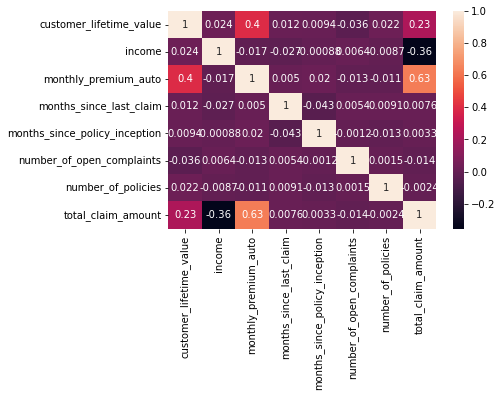

In [12]:
correlations_matrix = numericals.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

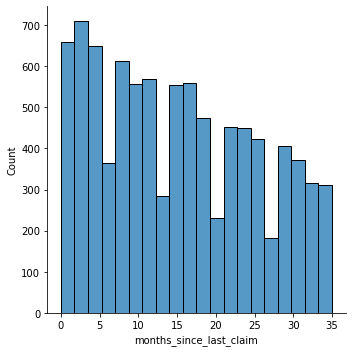

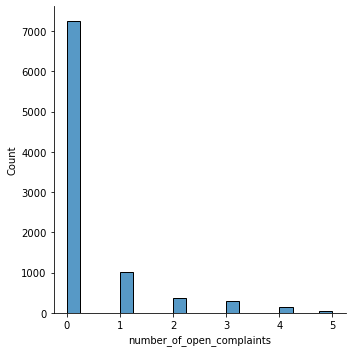

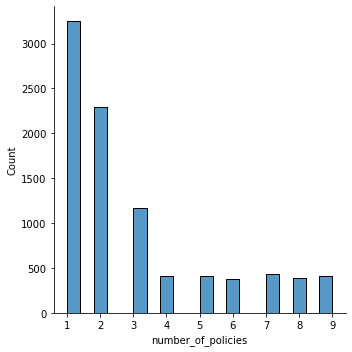

In [13]:
for col in discrete_df.columns:
    sns.displot(x = col, data = discrete_df, bins=20)
    plt.show()

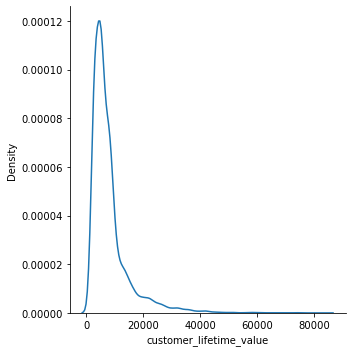

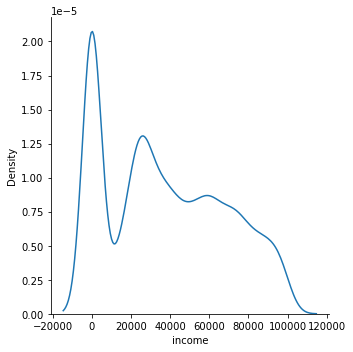

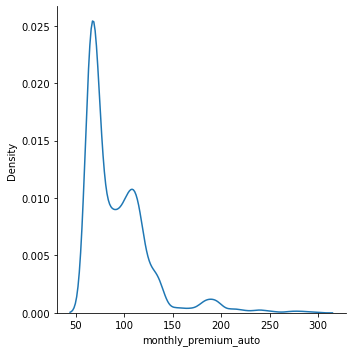

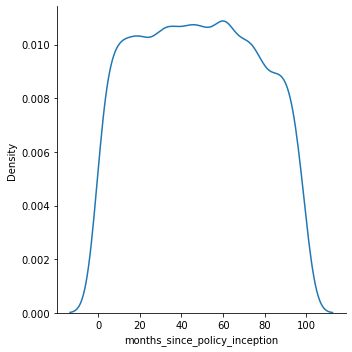

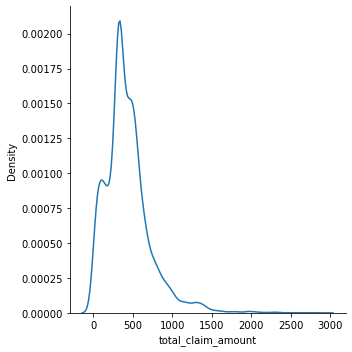

In [14]:
#I've found a type of plot to print continuous variables here: 
#https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation  
for col in continuous_df:
    sns.displot(continuous_df[col],kind="kde")




/Users/victor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


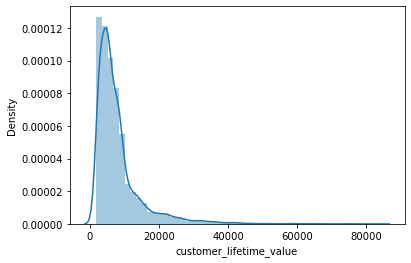

/Users/victor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


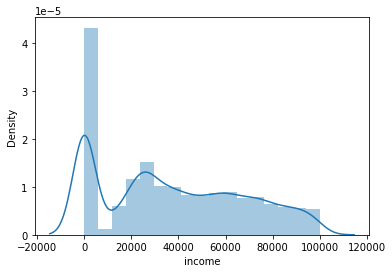

/Users/victor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


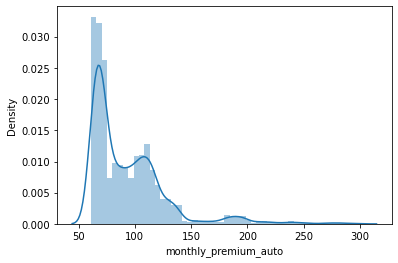

/Users/victor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


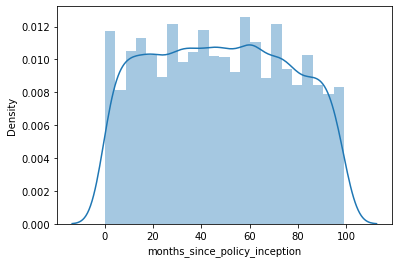

/Users/victor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


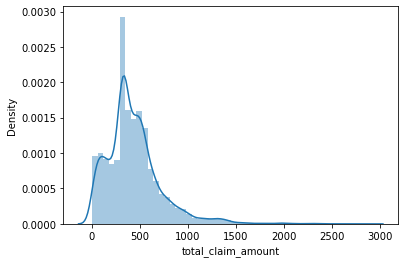

In [15]:
#I'm going to use distplot too because I think is a better option 
#but I know it's going to desapear
for col in continuous_df.columns:
    sns.distplot(continuous_df[col])
    plt.show()

In [16]:
#I can observe that depending on the type of data the plots are different, so in the discret variables 
#I observe the data is more concentrated, so the distributions have their form and in the continuous ones it changes more 

/Users/victor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


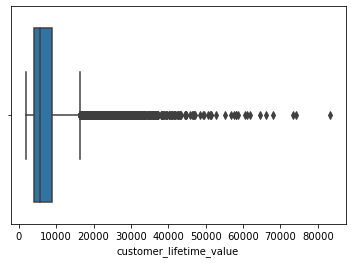

/Users/victor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


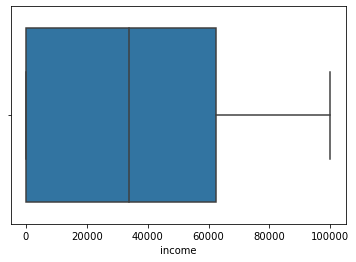

/Users/victor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


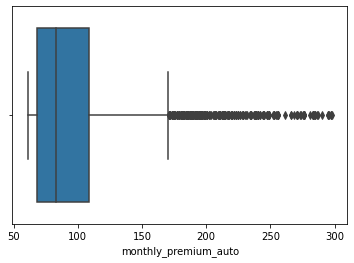

/Users/victor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


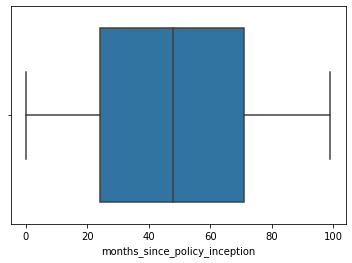

/Users/victor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


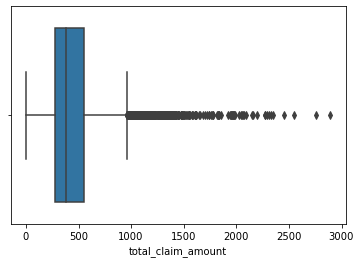

In [17]:
for col in continuous_df.columns:
    sns.boxplot(continuous_df[col])
    plt.show()

In [18]:
#I can observe that there are outliers in two continuous variables:
#customer_lifetime_value and total_claim_amount

In [19]:
#One posible solution could be cleaning them with a logaritmic transformation
#as we have seen in the lesson 

In [20]:
continuous_df['customer_lifetime_value'].value_counts(dropna=False)

7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

In [21]:
continuous_df['total_claim_amount'].value_counts(dropna=False)

316.800000    116
292.800000    110
312.000000    108
350.400000    105
331.200000    102
             ... 
377.442796      1
20.985105       1
280.897050      1
268.130863      1
790.784983      1
Name: total_claim_amount, Length: 5106, dtype: int64

In [22]:
#I'll check how many values will be removed 

In [23]:
iqr = np.nanpercentile(continuous_df['customer_lifetime_value'],75) - np.nanpercentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = continuous_df[continuous_df['customer_lifetime_value'] > upper_limit]
len(extraordinary_points) 

16414.039911750002


817

In [24]:
#In this case the outliers are almost 10% so I wouldn´t eliminate them
#also knowing that there aren´t many duplicated values

In [25]:
iqr = np.nanpercentile(continuous_df['total_claim_amount'],75) - np.nanpercentile(continuous_df['total_claim_amount'],25)
upper_limit = np.nanpercentile(continuous_df['total_claim_amount'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = continuous_df[continuous_df['total_claim_amount'] > upper_limit]
len(extraordinary_points) 

960.3997301249999


453

In [26]:
#The threatment for total_claim_amount would be different, in this case I would eliminate the outliers because the quantity is lower

In [27]:
TCA_dropped = continuous_df[continuous_df['total_claim_amount'] <= upper_limit].copy()
TCA_dropped.shape

(8681, 5)

In [28]:
iqr = np.nanpercentile(TCA_dropped['customer_lifetime_value'],75) - np.nanpercentile(TCA_dropped['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(TCA_dropped['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = TCA_dropped[TCA_dropped['customer_lifetime_value'] > upper_limit]
len(extraordinary_points) 

15901.8188285


741

In [29]:
#The number has decreased but it's near to the 10% too, so I won't drop them

In [30]:
numericals.isnull().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [31]:
#There are no nulls, so nothing to do

In [32]:
#
#Lab | Cleaning categorical data
#

In [33]:
categorical_df = customer_df.select_dtypes(object)
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [34]:
categorical_df.isnull().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [35]:
#There are no nulls, so nothing to do

In [36]:
for col in categorical_df.columns:
    print(categorical_df[col].value_counts())
    

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     67

In [37]:
#As I expected, customer has no duplicated values because it is an identifier
#so I would drop it

In [38]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [39]:
#All data types are object, so they have sense as categorical data

In [40]:
#renew_offer_type has alpha and numeric data and I'd eliminate the word Offer
#then customer column contains alpha and numeric data but, as I have said, they are identifiers

In [41]:
#policy_type and policy are also related, I'd eliminate the policy_type and I'd convert the column policy 
#in 3 numerical columns called Personal, Corporate and Special

In [42]:
#Gender and response have only two different values so I will convert then in 0 and 1

In [43]:
def cleanOffer (x):
    x=x.replace('Offer','')
    x=pd.to_numeric(x, errors='coerce')
    return x
    
categorical_df['renew_offer_type']=list(map(cleanOffer, categorical_df['renew_offer_type']))

/var/folders/cv/t2rhm3mj23j8jm825rqyn7bm0000gn/T/ipykernel_23442/734462411.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['renew_offer_type']=list(map(cleanOffer, categorical_df['renew_offer_type']))


In [44]:
categorical_df['gender'] = categorical_df['gender'].map({'F': 1, 'M': 0}).astype(int)
categorical_df['response'] = categorical_df['response'].map({'Yes': 1, 'No': 0}).astype(int)

/var/folders/cv/t2rhm3mj23j8jm825rqyn7bm0000gn/T/ipykernel_23442/1231209357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['gender'] = categorical_df['gender'].map({'F': 1, 'M': 0}).astype(int)
/var/folders/cv/t2rhm3mj23j8jm825rqyn7bm0000gn/T/ipykernel_23442/1231209357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['response'] = categorical_df['response'].map({'Yes': 1, 'No': 0}).astype(int)


In [45]:
def cleanPolicy (x, word):
    if word in x:
        x=x.replace(word,'')
        x=pd.to_numeric(x, errors='coerce')
    else:
        x=0
    return x
    
import itertools
categorical_df['special_policy']=list(map(cleanPolicy, categorical_df['policy'], itertools.repeat('Special L', len(categorical_df['policy']))))
categorical_df['corporate_policy']=list(map(cleanPolicy, categorical_df['policy'], itertools.repeat('Corporate L', len(categorical_df['policy']))))
categorical_df['personal_policy']=list(map(cleanPolicy, categorical_df['policy'], itertools.repeat('Personal L', len(categorical_df['policy']))))


/var/folders/cv/t2rhm3mj23j8jm825rqyn7bm0000gn/T/ipykernel_23442/3897645254.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['special_policy']=list(map(cleanPolicy, categorical_df['policy'], itertools.repeat('Special L', len(categorical_df['policy']))))
/var/folders/cv/t2rhm3mj23j8jm825rqyn7bm0000gn/T/ipykernel_23442/3897645254.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['corporate_policy']=list(map(cleanPolicy, categorical_df['policy'], itertools.repeat('Corporate

In [46]:
categorical_df = categorical_df.drop(['policy', 'policy_type'], axis=1)
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,renew_offer_type,sales_channel,vehicle_class,vehicle_size,special_policy,corporate_policy,personal_policy
0,BU79786,Washington,0,Basic,Bachelor,Employed,1,Suburban,Married,1,Agent,Two-Door Car,Medsize,0,3,0
1,QZ44356,Arizona,0,Extended,Bachelor,Unemployed,1,Suburban,Single,3,Agent,Four-Door Car,Medsize,0,0,3
2,AI49188,Nevada,0,Premium,Bachelor,Employed,1,Suburban,Married,1,Agent,Two-Door Car,Medsize,0,0,3
3,WW63253,California,0,Basic,Bachelor,Unemployed,0,Suburban,Married,1,Call Center,SUV,Medsize,0,2,0
4,HB64268,Washington,0,Basic,Bachelor,Employed,0,Rural,Single,1,Agent,Four-Door Car,Medsize,0,0,1


In [47]:
#In my opinion, it's needed to codificate the other columns

In [48]:
#
#Lab | Feature extraction
#

In [49]:
#First of all, I'm going to upload the original data so I can work without my modifications

In [50]:
categoricals = customer_df.select_dtypes(object)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [51]:
#As I saw, customer has no duplicated values because it is an identifier so I won't plot it
categoricals = categoricals.drop(['customer'], axis=1)

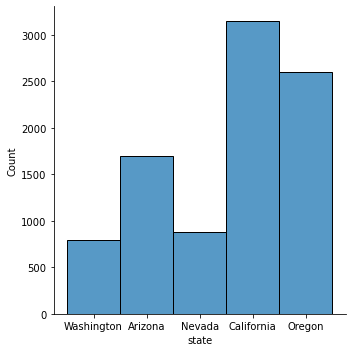

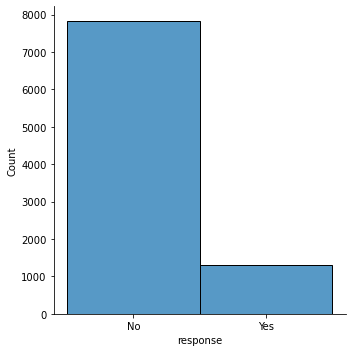

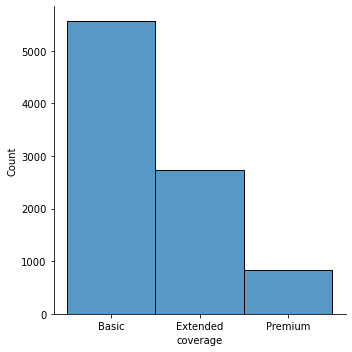

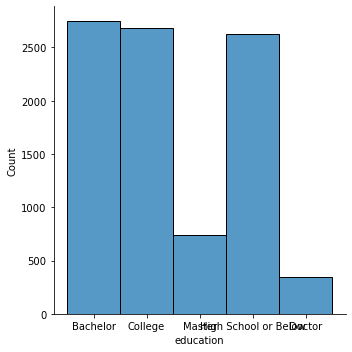

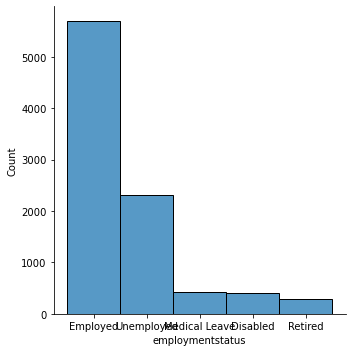

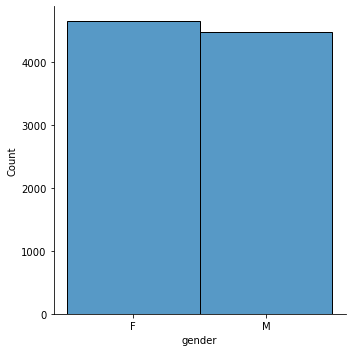

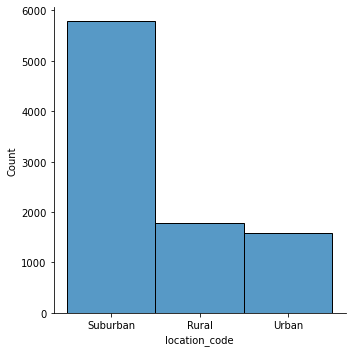

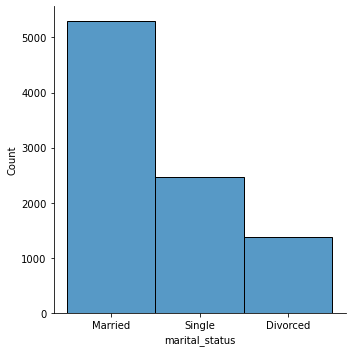

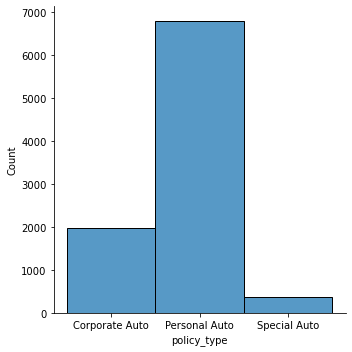

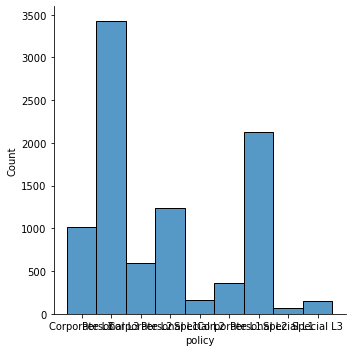

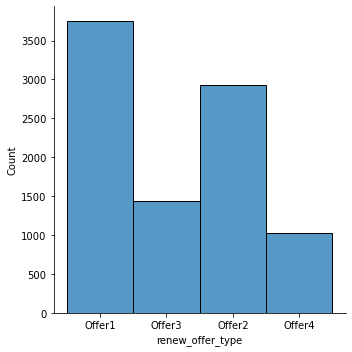

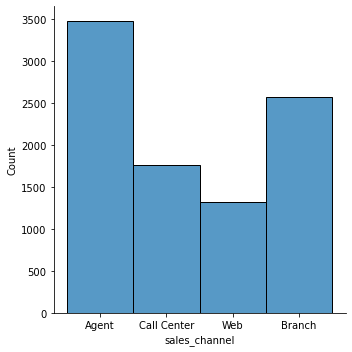

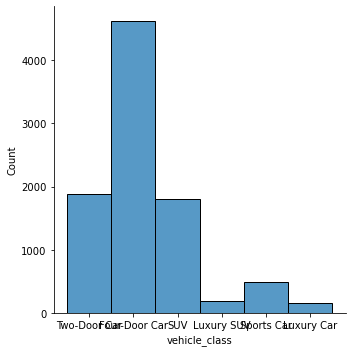

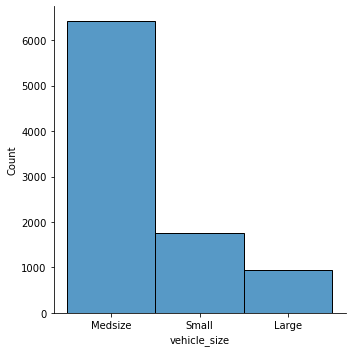

In [52]:
#I'm going to plot the categorical variables with a bar graphic
for col in categoricals.columns:
    sns.displot(x = col, data = categoricals)
    plt.show()

In [53]:
#In gender, I can see that I have almos the same value so it could be indifferent
print(categoricals['gender'].value_counts())

F    4658
M    4476
Name: gender, dtype: int64


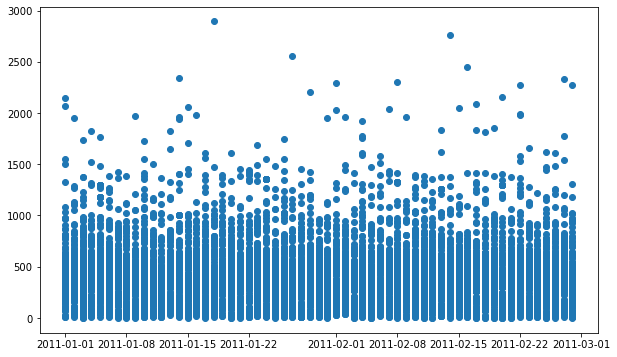

In [54]:
plt.figure(figsize=(10,6))
plt.plot_date(customer_df['effective_to_date'], customer_df['total_claim_amount'])
plt.show()

In [55]:
#I can't observe many differences along the time